# Regression with TensorFlow

Predicting a numerical variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.2.0'

### Creating some data to view and fit

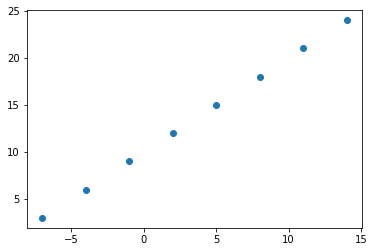

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualiza it
plt.scatter(X, y)

In [5]:
# The relationship between X and y is y = X+10

y == X+10

# This is the function we want our neural network to learn

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Inputs and outputs shapes

In [6]:
# Create a demo tensor for a mock housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
# What is input and output shapes for our created X and y?
input_shape = X[0].shape
output_shape = y[.shape
input_shape, output_shape

((8,), (8,))